<a href="https://colab.research.google.com/github/btomoda/coteminas/blob/main/Coteminas_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descrição Case Data Scientist - Demand Forecast


## Import de bibliotecas + análise inicial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
!wget 'https://ammo-datascience-sharing.s3-us-west-2.amazonaws.com/raw_updated_data.csv' -O raw_data.csv

--2021-04-08 16:38:13--  https://ammo-datascience-sharing.s3-us-west-2.amazonaws.com/raw_updated_data.csv
Resolving ammo-datascience-sharing.s3-us-west-2.amazonaws.com (ammo-datascience-sharing.s3-us-west-2.amazonaws.com)... 52.218.234.161
Connecting to ammo-datascience-sharing.s3-us-west-2.amazonaws.com (ammo-datascience-sharing.s3-us-west-2.amazonaws.com)|52.218.234.161|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 216977458 (207M) [text/csv]
Saving to: ‘raw_data.csv’

raw_data.csv        100%[===================>] 206.93M  21.6MB/s    in 11s     

2021-04-08 16:38:24 (18.9 MB/s) - ‘raw_data.csv’ saved [216977458/216977458]



In [4]:
## Funções auxiliares
def mean_absolute_percentage_error(y_true, y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   mape_list = np.abs((y_true - y_pred) / y_true)
   mape = np.mean(mape_list) * 100
   return mape
  
def weighted_mean_absolute_percentage_error(y_true, y_pred):
   y_true, y_pred = np.array(y_true), np.array(y_pred)
   mape_list = np.abs((y_true - y_pred) / y_true)
   weights = np.abs(y_true/y_true.sum())
   weighted_mape = (mape_list * weights).sum() * 100
   return weighted_mape

In [5]:
df_challenge = pd.read_csv('raw_data.csv', encoding='utf-8-sig', sep=";", decimal = ",")
df_challenge.head()

,sku,creationDate,size,color,skuCollection,skuUnitOfMeasurement,productSegment,productCategory,productLine,productCollection,productProfile,productTouchId,productSeasonId,productOccasionId,productCareId,productBrandId,productMacroCategory,skuLength,skuWidth,skuHeight,skuIsBundle,skuProducedInternationally,minPurchaseValueFrom,maxPurchaseValueFrom,avgPurchaseValueFrom,stddevPurchaseValueFrom,minPurchaseValueTo,maxPurchaseValueTo,avgPurchaseValueTo,stddevPurchaseValueTo,amount
0,b'-cu@\x12\x8ef\x9a\xd2&\x10\x8f\xbd\xdb\xa8N\...,2019-05-28,"b'\t)?\x15% \x13\x08\xb0\xae|\xdb""|*\xad_\xb9\...",b'8\x9f\x96\xce\xe4\x98\xe9\xd5N\x9cU<\x89\xe6...,b'\xb3\xd9B\xf5\x07\xb4\x197\xbaK!\x956\r\xb1m...,b'\xb8G\xf4\xac-\xf7\xc6`\xf0\x0f\xc8\xf9\xb4\...,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,b'\x9ef\xe2\xbc\x9b\xcb\xd9\xaa$\x83\xcaZ\xa6\...,b'\x7f\x9cV%\xb7x\x82{\x13\x7fI0\x12\xfe\x08\x...,b'\xa9\x87\xd9\x18\xf9\x80\xb8\xa3d\xa6=\xf1\x...,b'\xb3U\xa5T\xaf\xab\x1ct;\x04\t\r\xa3\xa9U\x8...,b'TE\xbc\n\xd7\xc4Y\xb8\xdemf\x14j\x9d\xae\xbd...,b'\xc4\xb2D\xcaz\xa8[\x97hI\x1ej\xe1\xf4\xf3\x...,b'x\xcca\xd1R\x97A\x0fsm\xea\x9c\xc6>vSQ\x18\x...,NaN,b'\x1e\xf5\xca\x05\\`\x8cM\xe9\x1d\x83\x8a\x11...,b'\x1e\xf9\x92\xed\x1c\xbe\x93J\xe3\xd6y}\x95\...,63.0,8.2,53.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,b'Ruy\xd9\x06j\x13\xe8\x9d:7\xbao\x05\xc2\x9a\...,2019-05-29,b'D[\xcc\xe0OC/9\x1c\xc7V\x19\x802Y\xa6c\x16\x...,b'\xe7c\x14\x1b\xdd\xa7\xa6q\x17\x13B\x01\xdbe...,b'\xb3\xd9B\xf5\x07\xb4\x197\xbaK!\x956\r\xb1m...,b'\xb8G\xf4\xac-\xf7\xc6`\xf0\x0f\xc8\xf9\xb4\...,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,b'\xe8\x1d\x1f\x85\xa0\x91^m&\xfc\x04f/\xe7\x0...,NaN,b'\xd6\x9f\xa2*\xc9\x11\xba\xf7+\xaa/\x10<\\m\...,"b""\xc6\x07~\xf3\xe2\xcfl\xd7\x85\xb9\xfb\x01\x...",NaN,NaN,NaN,NaN,b'+\x82\xfe@\x0b\x86:\x06\x9ehv\xa9?\x1f\xc8\x...,b'\xc27B\x9b\xc6\x08\xcba\xa6.\x9b\x1emw\xb8\x...,42.0,15.0,47.0,False,NaN,58380.0,58380.0,58380.0,NaN,58380.0,58380.0,58380.0,NaN,1
2,b'\x12G\x0e\xabC\x9e\xe7\x1c\xe0\xed\xe7w\xc8\...,2018-02-06,b'%\xd9\x89\x93\x9a\x85w\x91!\xdf\xfdlS\xde\x1...,b'\xe7c\x14\x1b\xdd\xa7\xa6q\x17\x13B\x01\xdbe...,b'\xa3\xd6_8\x08@d\xb0\xe2\x03\xa7\x8b\x89o\xd...,b'\xb8G\xf4\xac-\xf7\xc6`\xf0\x0f\xc8\xf9\xb4\...,b'\xe4\x1b\xc1\x04_\xbf\x81`\x02\xe79\xe7 |\\\...,b'n\x95\x84Q\x14\xd7i\xe6r8*\xfd*C\x93\x92+\x8...,b'\xcf#%\xa9\xf8\x07\x8a\x1a\x97\x87\xd7\x84\x...,b'\xa9\x87\xd9\x18\xf9\x80\xb8\xa3d\xa6=\xf1\x...,b'\xd52\x86=\x93\xd8yJ\xc6rbr\xb4X\xa2!\xd2}/\...,b'9)\x18\x88/|\x0e\x9ft\xafOyJ\xbch\xad \xdfd[...,NaN,b'\xeb\xe8l\xdcu\xf8\xaa\xd2\xc8\t9\xce\xf4\xa...,NaN,b'S-\x81\x0f2\xd8\xe1]\x03\n\xad\xdaN\x1a\xc4\...,"b'Tc\xc4\xf8\xc6\xbb\xde\xa0\xa8\xa2\x05v""\xb2...",40.0,7.5,27.0,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,b'\xbb\x9c`d+\xb3\x93C\xbc!\x05\x95\xfep\xe0\x...,2018-04-22,b'\xbc\x85q\xd5\x16\xac\xb9\x82\x16\xc9O\x1c\x...,b'Jm\xf4\xc6\xd9\xaa\xcdj\xcc\t7\xa8f\x007\x82...,b'|j\xed\x042Z\x86\xd4\x9d\xfd\x83\x9c\x87\xe4...,b'\xb8G\xf4\xac-\xf7\xc6`\xf0\x0f\xc8\xf9\xb4\...,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,b'F[(\xe6\x97T$\xf6Qk\x9c\xf1\xd2\xf6\x9d\xf2<...,b'_\xf2\xa8l\x80\xba=V\x93\x95C\xe8g\xa1n\xa6X...,b'\xe8zw\xe2\xb6\xec\xb7\xb3o?\x86\x9ff\\\xbb\...,b'\xb3U\xa5T\xaf\xab\x1ct;\x04\t\r\xa3\xa9U\x8...,b'B\xd4\xdf\x06*\xe8o\xc7\xdd\xec\xfbtVX\xf40\...,NaN,"b'~\xac\xbfl-\x12\x9c\xcd""\xe2v\xb1\x15\xdc\xe...",NaN,b'\x1c9\xe3co\x83I\xc1@\xa9\xed\x89\xe66\x00qR...,b'\xc27B\x9b\xc6\x08\xcba\xa6.\x9b\x1emw\xb8\x...,23.0,8.0,28.0,False,NaN,335580.0,335580.0,335580.0,0.0,251580.0,251580.0,251580.0,0.0,10
4,b'\xbb\x9c`d+\xb3\x93C\xbc!\x05\x95\xfep\xe0\x...,2018-04-07,b'\xbc\x85q\xd5\x16\xac\xb9\x82\x16\xc9O\x1c\x...,b'Jm\xf4\xc6\xd9\xaa\xcdj\xcc\t7\xa8f\x007\x82...,b'|j\xed\x042Z\x86\xd4\x9d\xfd\x83\x9c\x87\xe4...,b'\xb8G\xf4\xac-\xf7\xc6`\xf0\x0f\xc8\xf9\xb4\...,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,b'F[(\xe6\x97T$\xf6Qk\x9c\xf1\xd2\xf6\x9d\xf2<...,b'_\xf2\xa8l\x80\xba=V\x93\x95C\xe8g\xa1n\xa6X...,b'\xe8zw\xe2\

In [6]:
df_challenge.columns

Index(['sku', 'creationDate', 'size', 'color', 'skuCollection',
       'skuUnitOfMeasurement', 'productSegment', 'productCategory',
       'productLine', 'productCollection', 'productProfile', 'productTouchId',
       'productSeasonId', 'productOccasionId', 'productCareId',
       'productBrandId', 'productMacroCategory', 'skuLength', 'skuWidth',
       'skuHeight', 'skuIsBundle', 'skuProducedInternationally',
       'minPurchaseValueFrom', 'maxPurchaseValueFrom', 'avgPurchaseValueFrom',
       'stddevPurchaseValueFrom', 'minPurchaseValueTo', 'maxPurchaseValueTo',
       'avgPurchaseValueTo', 'stddevPurchaseValueTo', 'amount'],
      dtype='object')

In [7]:
def Funcao_descritiva(Nome_tabela):

    # Colunas e tipo de coluna
    tabela_aux_tipo = pd.DataFrame(Nome_tabela.dtypes).reset_index()
    tabela_aux_tipo.rename({"index":"Colunas",0:"Tipo"}, axis=1, inplace=True)
    # Contagem de linhas 
    tabela_aux_tipo["Num_linhas"] = Nome_tabela.shape[0]

    # Quantidade de nulls
    tabela_aux_null = pd.DataFrame((Nome_tabela).isnull().sum()).reset_index()
    tabela_aux_null.rename({"index":"Colunas",0:"Qtd_Nulls"}, axis=1, inplace=True)

    # Quantidade da cardinalidade
    tabela_aux_unique = pd.DataFrame((Nome_tabela).nunique()).reset_index()
    tabela_aux_unique.rename({"index":"Colunas",0:"Qtd_Valores_unicos"}, axis=1, inplace=True)

    # Juntar numa base unica 
    tabela_aux_join = tabela_aux_tipo.merge(tabela_aux_null, how = "left", on = "Colunas")
    tabela_aux_join = tabela_aux_join.merge(tabela_aux_unique, how = "left", on = "Colunas")

    return tabela_aux_join

In [8]:
Funcao_descritiva(df_challenge)

,Colunas,Tipo,Num_linhas,Qtd_Nulls,Qtd_Valores_unicos
0,sku,object,81993,0,432
1,creationDate,object,81993,0,2426
2,size,object,81993,0,41
3,color,object,81993,0,70
4,skuCollection,object,81993,1851,25
5,skuUnitOfMeasurement,object,81993,0,3
6,productSegment,object,81993,0,6
7,productCategory,object,81993,0,40
8,productLine,object,81993,29963,82
9,productCollection,object,81993,5978,25


## Parte 1 - Pré-Processamento dos dados

1. Através do dataset fornecido em csv, construa um pandas DataFrame, selecionando as colunas relevantes, adequando possíveis valores de colunas aos dtypes ideais e colocando labels mais amigáveis (números inteiros) em relação aos dados categóricos fornecidos. Também nesta fase você pode criar um ou mais colunas, combinando dados, se achar necessário.
2. Feito isso, descubra quais são as macro categorias responsáveis por 80% do faturamento no período todo do dataset.
3. Para fins de simplificação do teste, crie um dataset contendo apenas dados da principal macro categoria em termos de faturamento, selecione os dados apenas de 2018 em diante, até o final de Janeiro de 2020.
4. Separe o dataset resultante em dataset de treino (dados de 2018 em diante até o final de 2019) e teste (dados de Janeiro de 2020).


Nesse primeiro processamento, o objetivo foi identificar qual o faturamento de cada macro categoria, para que assim possamos identificar quais macro categorias são responsáveis por 80% do faturamento no período todo do dataset. 
Para realizar isso, temos alguns problemas iniciais: 
1. Existem informações nulas referentes aos valores pagos de alguns SKU
2. A coluna amount pode referenciar ao número de SKU vendido, podendo ser maior que 1. 

Dessa forma, a estratégia utilizada foi:
1. Determinar o preço de compra unitário de cada SKU

    a. Cálculo de avgPurchaseValueTo/amount 
2. Calcular a receita adquirida com cada linha de compra
    
    Preço médio por SKU * unidade(amount)
3. Agrupar por macrocategoria e somar o faturamento por linha de compra


In [9]:
df_challenge_filtered = df_challenge[['sku','creationDate','productSegment','productCategory','productCollection','productSeasonId','productOccasionId','productCareId','productMacroCategory','skuLength', 'skuWidth','skuHeight', 'skuIsBundle','minPurchaseValueFrom', 'maxPurchaseValueFrom', 'avgPurchaseValueFrom','stddevPurchaseValueFrom', 'minPurchaseValueTo', 'maxPurchaseValueTo','avgPurchaseValueTo', 'stddevPurchaseValueTo', 'amount']]

In [10]:
df_challenge_filtered["avgPurchaseValueFrom_persku"] = df_challenge_filtered["avgPurchaseValueFrom"]/df_challenge_filtered["amount"]
df_challenge_filtered["avgPurchaseValueTo_persku"] = df_challenge_filtered["avgPurchaseValueTo"]/df_challenge_filtered["amount"]

In [11]:
## dataframe auxiliar para encontrar o valor médio do sku
df_faturamento = df_challenge_filtered.groupby(["sku",'productMacroCategory']).agg({'avgPurchaseValueFrom_persku':'mean', 'avgPurchaseValueTo_persku':'mean','amount':'sum'}).reset_index()

In [12]:
def preenche_valor_sku(sku, valor):
  if pd.isna(valor):
    return df_faturamento.loc[df_faturamento["sku"]== sku,"avgPurchaseValueTo_persku"].reset_index(drop=True)[0]
  return valor

In [13]:
df_challenge_filtered["new_valor_purchase_row"] = df_challenge_filtered.apply(lambda row: preenche_valor_sku(row['sku'],row['avgPurchaseValueTo_persku']), axis = 1)

In [14]:
df_challenge_filtered["faturamento_sku"] = df_challenge_filtered.amount*df_challenge_filtered["new_valor_purchase_row"] 

In [15]:
df_macro = df_challenge_filtered.groupby("productMacroCategory").agg({"faturamento_sku":'sum'}).reset_index()
df_macro['perc'] = df_macro["faturamento_sku"]/df_macro["faturamento_sku"].sum() 

In [16]:
df_macro.sort_values('perc',ascending=False, inplace=True)

In [17]:
df_macro['sum_perc'] = df_macro.perc.cumsum()*100
df_macro

,productMacroCategory,faturamento_sku,perc,sum_perc
22,b'\xff\x9e\xbbe\xf4\x00\x8b\xbd\x98_G\x06\xf0\...,1.390430e+10,0.360015,36.001505
9,b'\x1e\xf9\x92\xed\x1c\xbe\x93J\xe3\xd6y}\x95\...,9.406561e+09,0.243558,60.357309
1,"b""\xcc\xa3\x8a\xfa\xda\xc4\xd1nT\n\xbf\\\x1f3d...",4.083437e+09,0.105730,70.930289
7,"b'Tc\xc4\xf8\xc6\xbb\xde\xa0\xa8\xa2\x05v""\xb2...",3.427145e+09,0.088737,79.803975
4,b'Cs\xd8?\xea\xdf!Z\x06\xce\xc4`ww\xf1\xc0\x80...,2.007584e+09,0.051981,85.002083
8,"b'\x02\x07\xfa\x1a\xaf\xcb\x91\xd9\x86""]\x11H-...",1.056329e+09,0.027351,87.737168
21,"b'\xf3E\xc2\x87\xef8E\xd55\xd9gb,Xb\xb9\xe1\xa...",9.870122e+08,0.025556,90.292775
11,b'\x97\xdep\n\xa7#/\x98\xb1\xd4\x96\xbb!z\x9a\...,6.472034e+08,0.016758,91.968538
14,b'\xb8y\x9ca-\x19p\xae\xa9)\x94V\x89\x8c\xb5\x...,6.415022e+08,0.016610,93.629538
17,b'\xd4\xd7\x91\x00\xf9\xcb_\x94\x91\x14\xa3\xd...,6.007139e+08,0.015554,95.184928


In [18]:
## As macro categorias responsáveis por 80% do faturamento no período todo do dataset.
df_macro[df_macro["sum_perc"] <= 80]["productMacroCategory"]

22    b'\xff\x9e\xbbe\xf4\x00\x8b\xbd\x98_G\x06\xf0\...
9     b'\x1e\xf9\x92\xed\x1c\xbe\x93J\xe3\xd6y}\x95\...
1     b"\xcc\xa3\x8a\xfa\xda\xc4\xd1nT\n\xbf\\\x1f3d...
7     b'Tc\xc4\xf8\xc6\xbb\xde\xa0\xa8\xa2\x05v"\xb2...
Name: productMacroCategory, dtype: object

In [19]:
## Separação da principal macro categoria
major_category = df_macro[df_macro["faturamento_sku"] == df_macro["faturamento_sku"].max()]["productMacroCategory"].reset_index(drop=True)[0]
major_category

"b'\\xff\\x9e\\xbbe\\xf4\\x00\\x8b\\xbd\\x98_G\\x06\\xf0\\xb8\\xc3rY\\xb0]\\xe9C\\xbcnB\\xc5\\x03;j<Vb\\xba\\xbe\\x945\\xcd\\xaa\\xbf\\xf3#!\\xdet{\\x860\\xce\\xd0\\xb5P\\x93\\x9b\\x98\\x96\\x90\\xaa\\x96\\x15Uh\\xbc\\x0b\\x10\\xb1'"

In [20]:
dataset_novo = df_challenge_filtered[(df_challenge_filtered['creationDate'] > '2018')&(df_challenge_filtered['creationDate'] < '2020-02')&(df_challenge_filtered['productMacroCategory'] == major_category)]

## Parte 2 - Predição de Série Temporal Univariada

1. Vários modelos de predição de Série Temporal Univariada são possíveis. Escolha um modelo que você acredita ser adequado ao problema, considerando a granularidade diária de vendas. Fique à vontade para realizar uma feature engineering de dados de datas se julgar necessário.
2. Avalie o modelo realizando um backtest no dataset de treino para os dias do mês de Dezembro de 2019 e informe as medidas de erro de MSE, RMSE, MAPE e Weighted MAPE.
3. Realize as predições para os dias de Janeiro de 2020 e calcule as mesmas medidas de erro.


In [21]:
from datetime import datetime

In [22]:
## Nesse modelo de predição de série temporal univariada, utilizarei dados de data e faturamento
## Criação do df contendo essas informações
univariada = dataset_novo.groupby("creationDate").agg({"faturamento_sku":"sum"}).reset_index()
univariada.head()

,creationDate,faturamento_sku
0,2018-01-01,4.834190e+06
1,2018-01-02,2.894220e+06
2,2018-01-03,3.424452e+06
3,2018-01-04,4.360060e+06
4,2018-01-05,4.577580e+06


In [23]:
univariada["creationDate"] = univariada.apply(lambda row: datetime.strptime(row["creationDate"],'%Y-%m-%d').date(), axis = 1)
univariada.head()

,creationDate,faturamento_sku
0,2018-01-01,4.834190e+06
1,2018-01-02,2.894220e+06
2,2018-01-03,3.424452e+06
3,2018-01-04,4.360060e+06
4,2018-01-05,4.577580e+06


In [24]:
startdate = pd.to_datetime("2018-01-01").date()
enddate = pd.to_datetime("2020-01-01").date()
backdate = pd.to_datetime("2019-12-01").date()

In [25]:
## Separação do dataset resultante em treino e teste:
print(univariada.shape[0])
dataset_treino = univariada[(univariada["creationDate"] >= startdate)&(univariada["creationDate"] < enddate)]
print(dataset_treino.shape[0])
dataset_teste = univariada[(univariada["creationDate"] >= enddate)]
print(dataset_teste.shape[0])

761
730
31


In [26]:
dataset_backtest = univariada[(univariada["creationDate"] >= backdate)&(univariada["creationDate"] < enddate)]

Text(0, 0.5, 'Faturamento')

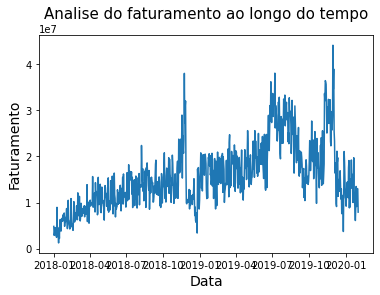

In [27]:
ax = sns.lineplot(x="creationDate",y='faturamento_sku', data=univariada)
plt.title('Analise do faturamento ao longo do tempo', y=1.05, size=15)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Faturamento', fontsize=14)

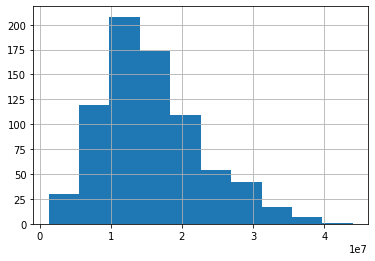

In [28]:
univariada["faturamento_sku"].hist()

In [29]:
divide = int(len(univariada)/2)
x = univariada['faturamento_sku'].values
c1, c2 = x[0:divide],x[divide:]
print(c1.mean())
print(c2.mean())
print(c1.var())
print(c2.var())
## Resultados indicam não estacionariedade da série

11800484.03326284
19692557.635724172
23969823497719.03
43652624073871.85


In [30]:
!pip install statsmodels==v0.11.0rc2
# !pip install statsmodels

In [31]:
from statsmodels.tsa.stattools import adfuller

resultado_c = adfuller(univariada['faturamento_sku'].values)
print('Estatística ADF', resultado_c[0])
print('p-valor %f' %resultado_c[1])
## Indica que a série tem uma tendência estácionária

Estatística ADF -3.17376655758862
p-valor 0.021554


In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
dataset_treino = dataset_treino.set_index("creationDate")
dataset_treino.head()
dataset_teste = dataset_teste.set_index("creationDate")
dataset_teste.head()
dataset_backtest = dataset_backtest.set_index("creationDate")
dataset_backtest.head()

,faturamento_sku
creationDate,
2019-12-01,3.887861e+07
2019-12-02,2.535048e+07
2019-12-03,2.330309e+07
2019-12-04,1.639375e+07
2019-12-05,1.853621e+07


In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [35]:
# modelo_ajustado = SimpleExpSmoothing(dataset_treino).fit(smoothing_level=1)
modelo_ajustado = ExponentialSmoothing(dataset_treino,seasonal_periods=100 ,trend='add', seasonal='add').fit(smoothing_level=0.5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [36]:
modelo_previsto = modelo_ajustado.forecast(dataset_teste.shape[0])

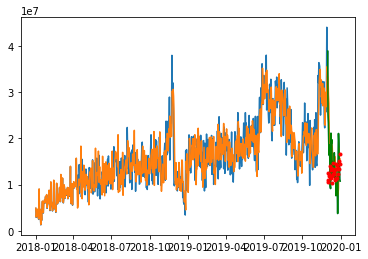

In [37]:
plt.plot(dataset_treino)
plt.plot(dataset_treino.index,modelo_ajustado.fittedvalues.values)
plt.plot(dataset_backtest,'g')
plt.plot(dataset_backtest.index,modelo_previsto,'r.')

In [38]:
from sklearn.metrics import mean_squared_error
print("MSE: {}" .format(mean_squared_error(dataset_backtest.reset_index()["faturamento_sku"], modelo_previsto)))
print("RMSE: {}" .format(np.sqrt(mean_squared_error(dataset_backtest.reset_index()["faturamento_sku"], modelo_previsto))))
print("MAPE: {}" .format(mean_absolute_percentage_error(dataset_backtest.reset_index()["faturamento_sku"], modelo_previsto)))
print("Weighted MAPE: {}" .format(weighted_mean_absolute_percentage_error(dataset_backtest.reset_index()["faturamento_sku"], modelo_previsto)))

MSE: 55348744276067.195
RMSE: 7439673.667310092
MAPE: 37.14564483856388
Weighted MAPE: 34.43228883998666


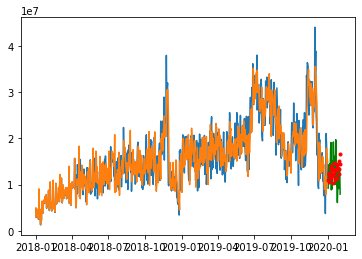

In [39]:
plt.plot(dataset_treino)
plt.plot(dataset_treino.index,modelo_ajustado.fittedvalues.values)
plt.plot(dataset_teste,'g')
plt.plot(dataset_teste.index,modelo_previsto,'r.')

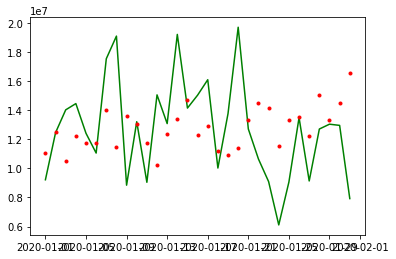

In [40]:
plt.plot(dataset_teste,'g')
plt.plot(dataset_teste.index,modelo_previsto,'r.')

In [41]:
from sklearn.metrics import mean_squared_error
print("MSE: {}" .format(mean_squared_error(dataset_teste.reset_index()["faturamento_sku"], modelo_previsto)))
print("RMSE: {}" .format(np.sqrt(mean_squared_error(dataset_teste.reset_index()["faturamento_sku"], modelo_previsto))))
print("MAPE: {}" .format(mean_absolute_percentage_error(dataset_teste.reset_index()["faturamento_sku"], modelo_previsto)))
print("Weighted MAPE: {}" .format(weighted_mean_absolute_percentage_error(dataset_teste.reset_index()["faturamento_sku"], modelo_previsto)))


MSE: 14696039304134.83
RMSE: 3833541.35286615
MAPE: 26.105145640770722
Weighted MAPE: 23.59031131307997


In [42]:
import statsmodels.api as sm

In [43]:
backstartdate = pd.to_datetime("2019-12-01").date()
backenddate = pd.to_datetime("2020-01-01").date()

In [44]:
startdate = pd.to_datetime("2020-01-01").date()
enddate = pd.to_datetime("2020-01-31").date()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


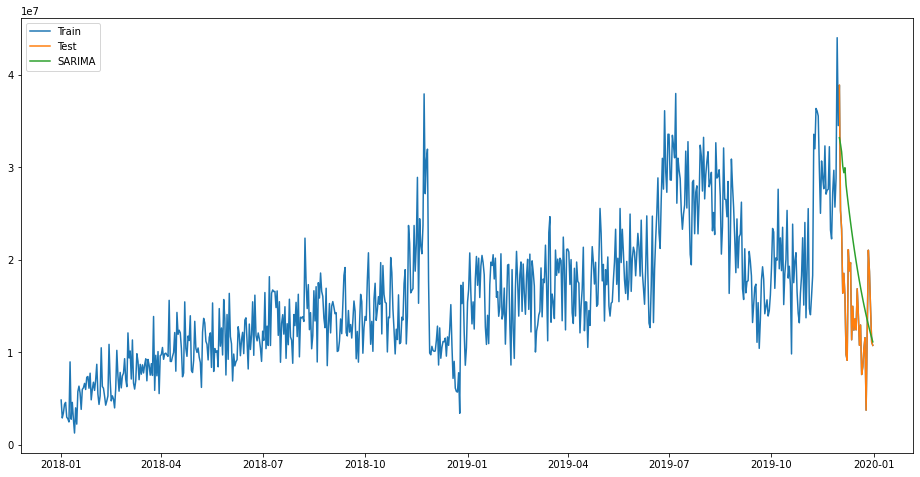

In [45]:
import statsmodels.api as sm
fit1 = sm.tsa.statespace.SARIMAX(dataset_treino["faturamento_sku"],order=(1, 0, 0), seasonal_order=(0, 0, 1, 7)).fit(use_boxcox=True)
dataset_backtest['SARIMA'] = fit1.predict(start=backstartdate, end=backenddate, dynamic=True)
plt.figure(figsize=(16, 8))
plt.plot(dataset_treino['faturamento_sku'], label='Train')
plt.plot(dataset_backtest['faturamento_sku'], label='Test')
plt.plot(dataset_backtest['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [46]:
print("MSE: {}" .format(mean_squared_error(dataset_backtest.reset_index()["faturamento_sku"], dataset_backtest.reset_index()["SARIMA"])))
print("RMSE: {}" .format(np.sqrt(mean_squared_error(dataset_backtest.reset_index()["faturamento_sku"], dataset_backtest.reset_index()["SARIMA"]))))
print("MAPE: {}" .format(mean_absolute_percentage_error(dataset_backtest.reset_index()["faturamento_sku"], dataset_backtest.reset_index()["SARIMA"])))
print("Weighted MAPE: {}" .format(weighted_mean_absolute_percentage_error(dataset_backtest.reset_index()["faturamento_sku"], dataset_backtest.reset_index()["SARIMA"])))


MSE: 72338730746651.77
RMSE: 8505217.854155868
MAPE: 61.46775128970968
Weighted MAPE: 48.192295322581806


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


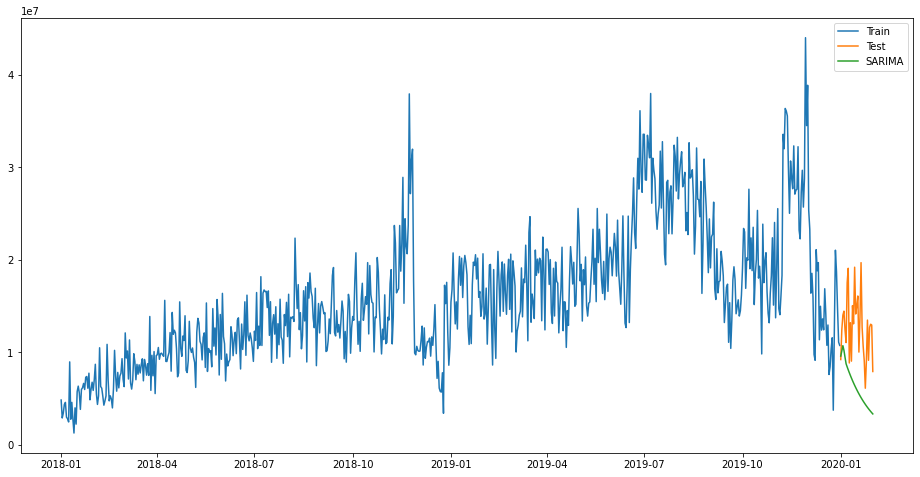

In [47]:
import statsmodels.api as sm
# fit1 = sm.tsa.statespace.SARIMAX(dataset_treino["faturamento_sku"],order=(1, 0, 5), seasonal_order=(0, 1, 2, 35)).fit(use_boxcox=True)
fit1 = sm.tsa.statespace.SARIMAX(dataset_treino["faturamento_sku"],order=(1, 0, 0), seasonal_order=(0, 0, 1, 7)).fit(use_boxcox=True)
dataset_teste['SARIMA'] = fit1.predict(start=startdate, end=enddate, dynamic=True)
plt.figure(figsize=(16, 8))
plt.plot(dataset_treino['faturamento_sku'], label='Train')
plt.plot(dataset_teste['faturamento_sku'], label='Test')
plt.plot(dataset_teste['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [48]:
print("MSE: {}" .format(mean_squared_error(dataset_teste.reset_index()["faturamento_sku"], dataset_teste.reset_index()["SARIMA"])))
print("RMSE: {}" .format(np.sqrt(mean_squared_error(dataset_teste.reset_index()["faturamento_sku"], dataset_teste.reset_index()["SARIMA"]))))
print("MAPE: {}" .format(mean_absolute_percentage_error(dataset_teste.reset_index()["faturamento_sku"], dataset_teste.reset_index()["SARIMA"])))
print("Weighted MAPE: {}" .format(weighted_mean_absolute_percentage_error(dataset_teste.reset_index()["faturamento_sku"], dataset_teste.reset_index()["SARIMA"])))


MSE: 53456506630777.555
RMSE: 7311395.669143994
MAPE: 47.96107639924372
Weighted MAPE: 50.34122923182795


Dentre os modelos testados, o modelo de ExponentialSmoothing apresentou os melhores resultados. 
As métricas obtidas foram de:

Nos dados de dezembro/2019:

    MSE: 55348744276067.195
    RMSE: 7439673.66
    MAPE: 37.14 %
    Weighted MAPE: 34.43 %

Nos dados de janeiro/2020:

    MSE: 14696039304134.83
    RMSE: 3833541.35
    MAPE: 26.10 %
    Weighted MAPE: 23.59 %

### Parte 3 - Predição de Série Temporal Multivariada

1. Vários modelos de predição de Série Temporal Multivariada são possíveis. Escolha um modelo que você acredita ser adequado ao problema, considerando a granularidade diária de vendas. Fique à vontade para realizar feature engineering se julgar necessário.
2. Avalie o modelo realizando um backtest no dataset de treino para os dias do mês de Dezembro de 2019 e informe as medidas de erro de MSE, RMSE, MAPE e Weighted MAPE.
3. Realize as predições para os dias de Janeiro de 2020 e calcule as mesmas medidas de erro.


In [49]:
dataset_novo.head()

,sku,creationDate,productSegment,productCategory,productCollection,productSeasonId,productOccasionId,productCareId,productMacroCategory,skuLength,skuWidth,skuHeight,skuIsBundle,minPurchaseValueFrom,maxPurchaseValueFrom,avgPurchaseValueFrom,stddevPurchaseValueFrom,minPurchaseValueTo,maxPurchaseValueTo,avgPurchaseValueTo,stddevPurchaseValueTo,amount,avgPurchaseValueFrom_persku,avgPurchaseValueTo_persku,new_valor_purchase_row,faturamento_sku
8,b'M\xfde\xd3&\x13&[\xe1\xa5\xf4\xcbX\x8b8A\x9c...,2018-04-10,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,"b'\xadA\xf5,\xaaJ\xeb\x10:\x87:\xa9\xe7j-#e\x1...",b'\x1c\x05\xb6\x17\x11\xf4\x8dS\xe5\xf7\xec\xf...,NaN,b'\xc7\x8cX\xe5O\xa5;\xb6\x10c\x1d%\x80\xb6\x8...,NaN,b'\xff\x9e\xbbe\xf4\x00\x8b\xbd\x98_G\x06\xf0\...,29.0,7.5,37.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,441478.7959,441478.7959
15,b'M\xfde\xd3&\x13&[\xe1\xa5\xf4\xcbX\x8b8A\x9c...,2018-06-19,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,"b'\xadA\xf5,\xaaJ\xeb\x10:\x87:\xa9\xe7j-#e\x1...",b'\x1c\x05\xb6\x17\x11\xf4\x8dS\xe5\xf7\xec\xf...,NaN,b'\xc7\x8cX\xe5O\xa5;\xb6\x10c\x1d%\x80\xb6\x8...,NaN,b'\xff\x9e\xbbe\xf4\x00\x8b\xbd\x98_G\x06\xf0\...,29.0,7.5,37.0,False,1049580.0,1049580.0,1049580.0,0.0,839580.0,839580.0,839580.0,0.0,5,209916.0,167916.0,167916.0000,839580.0000
16,b'M\xfde\xd3&\x13&[\xe1\xa5\xf4\xcbX\x8b8A\x9c...,2018-06-25,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,"b'\xadA\xf5,\xaaJ\xeb\x10:\x87:\xa9\xe7j-#e\x1...",b'\x1c\x05\xb6\x17\x11\xf4\x8dS\xe5\xf7\xec\xf...,NaN,b'\xc7\x8cX\xe5O\xa5;\xb6\x10c\x1d%\x80\xb6\x8...,NaN,b'\xff\x9e\xbbe\xf4\x00\x8b\xbd\x98_G\x06\xf0\...,29.0,7.5,37.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,441478.7959,441478.7959
20,b'M\xfde\xd3&\x13&[\xe1\xa5\xf4\xcbX\x8b8A\x9c...,2018-02-02,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,"b'\xadA\xf5,\xaaJ\xeb\x10:\x87:\xa9\xe7j-#e\x1...",b'\x1c\x05\xb6\x17\x11\xf4\x8dS\xe5\xf7\xec\xf...,NaN,b'\xc7\x8cX\xe5O\xa5;\xb6\x10c\x1d%\x80\xb6\x8...,NaN,b'\xff\x9e\xbbe\xf4\x00\x8b\xbd\x98_G\x06\xf0\...,29.0,7.5,37.0,False,1049580.0,1049580.0,1049580.0,NaN,713580.0,713580.0,713580.0,NaN,2,524790.0,356790.0,356790.0000,713580.0000
23,b'M\xfde\xd3&\x13&[\xe1\xa5\xf4\xcbX\x8b8A\x9c...,2018-04-15,b'\x06\xa4.A5\xbar\xb9\x06\xa7\x0e\xa493\xd7t\...,"b'\xadA\xf5,\xaaJ\xeb\x10:\x87:\xa9\xe7j-#e\x1...",b'\x1c\x05\xb6\x17\x11\xf4\x8dS\xe5\xf7\xec\xf...,NaN,b'\xc7\x8cX\xe5O\xa5;\xb6\x10c\x1d%\x80\xb6\x8...,NaN,b'\xff\x9e\xbbe\xf4\x00\x8b\xbd\x98_G\x06\xf0\...,29.0,7.5,37.0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,441478.7959,441478.7959


In [50]:
## Nesse modelo de predição de série temporal univariada, utilizarei dados de data, faturamento e média dos dados dos SKU`s
## Criação do df contendo essas informações
multivariada = dataset_novo.groupby("creationDate").agg({"faturamento_sku":"sum", 'skuLength':'mean','skuWidth':'mean','skuHeight':'mean'}).reset_index()
multivariada.head()

,creationDate,faturamento_sku,skuLength,skuWidth,skuHeight
0,2018-01-01,4.834190e+06,33.142857,6.642857,31.357143
1,2018-01-02,2.894220e+06,36.500000,11.125000,36.625000
2,2018-01-03,3.424452e+06,33.400000,6.900000,31.200000
3,2018-01-04,4.360060e+06,31.166667,7.083333,33.083333
4,2018-01-05,4.577580e+06,31.166667,7.500000,33.083333


In [51]:
multivariada["creationDate"] = multivariada.apply(lambda row: datetime.strptime(row["creationDate"],'%Y-%m-%d').date(), axis = 1)
multivariada.head()

,creationDate,faturamento_sku,skuLength,skuWidth,skuHeight
0,2018-01-01,4.834190e+06,33.142857,6.642857,31.357143
1,2018-01-02,2.894220e+06,36.500000,11.125000,36.625000
2,2018-01-03,3.424452e+06,33.400000,6.900000,31.200000
3,2018-01-04,4.360060e+06,31.166667,7.083333,33.083333
4,2018-01-05,4.577580e+06,31.166667,7.500000,33.083333


In [52]:
startdate = pd.to_datetime("2018-01-01").date()
enddate = pd.to_datetime("2020-01-01").date()
backdate = pd.to_datetime("2019-12-01").date()

In [53]:
## Separação do dataset resultante em treino e teste:
print(multivariada.shape[0])
dataset_treino = multivariada[(multivariada["creationDate"] >= startdate)&(multivariada["creationDate"] < enddate)]
print(dataset_treino.shape[0])
dataset_teste = multivariada[(multivariada["creationDate"] >= enddate)]
print(dataset_teste.shape[0])

761
730
31


In [54]:
dataset_treino['creationDate'] = pd.to_datetime(dataset_treino["creationDate"] , format = '%Y-%m-%d')
data_treino = dataset_treino.drop(['creationDate'], axis=1)
data_treino.index = dataset_treino["creationDate"]

In [55]:
dataset_teste['creationDate'] = pd.to_datetime(dataset_teste["creationDate"] , format = '%Y-%m-%d')
data_teste = dataset_teste.drop(['creationDate'], axis=1)
data_teste.index = dataset_teste["creationDate"]

In [56]:
dataset_backtest = multivariada[(multivariada["creationDate"] >= backdate)&(multivariada["creationDate"] < enddate)]

In [57]:
dataset_backtest['creationDate'] = pd.to_datetime(dataset_backtest["creationDate"] , format = '%Y-%m-%d')
data_backteste = dataset_backtest.drop(['creationDate'], axis=1)
data_backteste.index = dataset_backtest["creationDate"]

In [58]:
from statsmodels.tsa.vector_ar.var_model import VAR

In [59]:
model = VAR(endog=data_treino)
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [60]:
prediction = model_fit.forecast(model_fit.y, steps=len(data_teste))

In [61]:
cols = data_treino.columns

In [62]:
pred = pd.DataFrame(index=range(0,len(prediction)),columns=cols)
for j in range(0,4):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

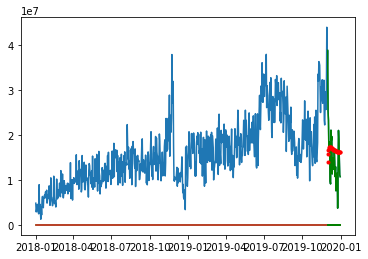

In [63]:
plt.plot(data_treino)
plt.plot(data_backteste,'g')
plt.plot(data_backteste.index,pred["faturamento_sku"],'r.')

In [64]:
print("MSE: {}" .format(mean_squared_error(data_backteste.reset_index()["faturamento_sku"], pred["faturamento_sku"])))
print("RMSE: {}" .format(np.sqrt(mean_squared_error(data_backteste.reset_index()["faturamento_sku"], pred["faturamento_sku"]))))
print("MAPE: {}" .format(mean_absolute_percentage_error(data_backteste.reset_index()["faturamento_sku"], pred["faturamento_sku"])))
print("Weighted MAPE: {}" .format(weighted_mean_absolute_percentage_error(data_backteste.reset_index()["faturamento_sku"], pred["faturamento_sku"])))


MSE: 48393389707006.41
RMSE: 6956535.754742184
MAPE: 46.31558915842139
Weighted MAPE: 34.97568319944644


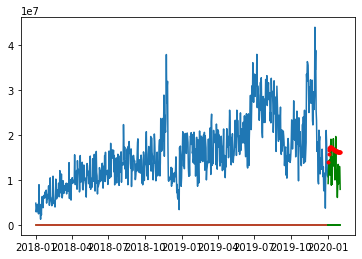

In [65]:
plt.plot(data_treino)
plt.plot(data_teste,'g')
plt.plot(data_teste.index,pred["faturamento_sku"],'r.')

In [66]:
print("MSE: {}" .format(mean_squared_error(data_teste.reset_index()["faturamento_sku"], pred["faturamento_sku"])))
print("RMSE: {}" .format(np.sqrt(mean_squared_error(data_teste.reset_index()["faturamento_sku"], pred["faturamento_sku"]))))
print("MAPE: {}" .format(mean_absolute_percentage_error(data_teste.reset_index()["faturamento_sku"], pred["faturamento_sku"])))
print("Weighted MAPE: {}" .format(weighted_mean_absolute_percentage_error(data_teste.reset_index()["faturamento_sku"], pred["faturamento_sku"])))


MSE: 25047005715742.145
RMSE: 5004698.3641116815
MAPE: 42.48148639186914
Weighted MAPE: 34.20989308389993


O modelo para Predição de Série Temporal Multivariada foi o VAR (Vector Auto Regression).  As métricas obtidas foram de:

Nos dados de dezembro/2019:

    MSE: 48393389707006.41
    RMSE: 6956535.75
    MAPE: 46.32 %
    Weighted MAPE: 34.98 %
Nos dados de janeiro/2020:

    MSE: 25047005715742.145
    RMSE: 5004698.36
    MAPE: 42.48 %
    Weighted MAPE: 34.21 %